In [35]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [36]:
df = pd.read_csv('/kaggle/input/housing-prices-dataset/Housing.csv') 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])
df['prefarea'] = label_encoder.fit_transform(df['prefarea'])
df['furnishingstatus'] = ordinal_encoder.fit_transform(df[['furnishingstatus']])
df['basement'] = label_encoder.fit_transform(df['basement'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2.0


In [38]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [39]:
df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [40]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

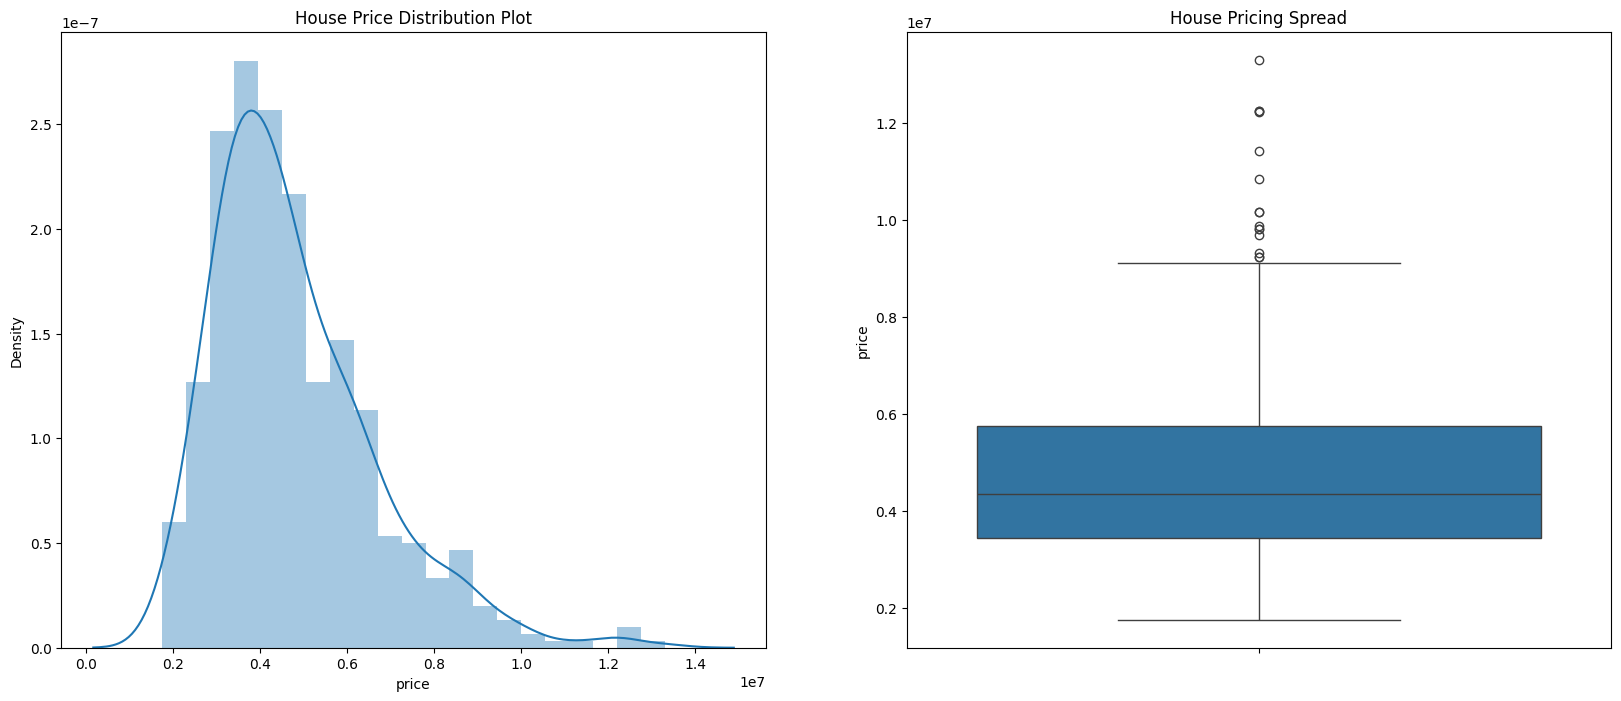

In [41]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title('House Pricing Spread')

plt.show()

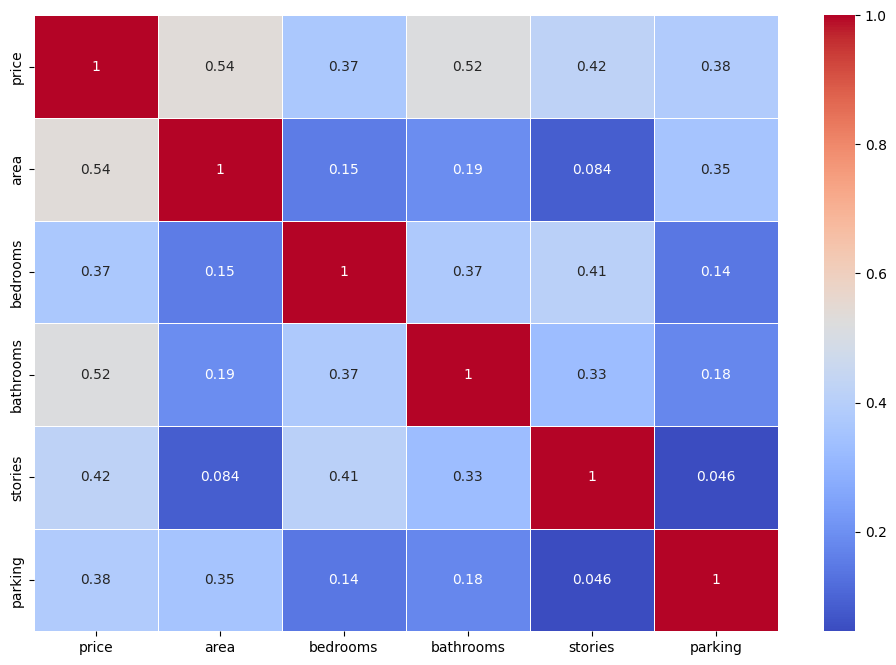

In [42]:
cor_matrix = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [43]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories','mainroad', 'basement', 'hotwaterheating','airconditioning','parking','furnishingstatus']]
y = df['price']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [45]:
X_train.shape

(436, 10)

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

lr = LinearRegression()
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()


In [48]:
estimators = [('lr',lr),('gb',gb),('rf',rf),('xgb',xgb)]

In [49]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X_train,y_train,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

lr 0.63
gb 0.6
rf 0.6
xgb 0.54


In [50]:
from sklearn.metrics import r2_score 
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators)
vr.fit(X_train,y_train)
y_pred = vr.predict(X_test)
r2_score(y_test, y_pred)

0.6006008138492558

Text(0, 0.5, 'y_pred')

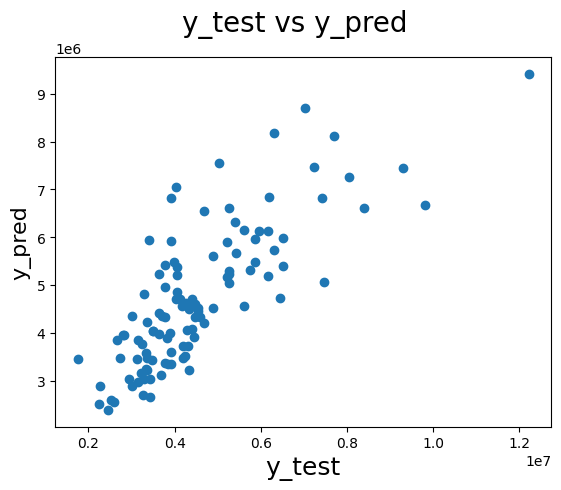

In [51]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

In [52]:
scores = cross_val_score(vr,X_train,y_train,scoring='r2',cv=15)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.63


In [54]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            for l in range(1,4):
                vr = VotingRegressor(estimators,weights=[i,j,k,l])
                scores = cross_val_score(vr,X_train,y_train,scoring='r2',cv=10)
                print("For i={},j={},k={},l={}".format(i,j,k,l),np.round(np.mean(scores),2))          

For i=1,j=1,k=1,l=1 0.64
For i=1,j=1,k=1,l=2 0.63
For i=1,j=1,k=1,l=3 0.62
For i=1,j=1,k=2,l=1 0.64
For i=1,j=1,k=2,l=2 0.63
For i=1,j=1,k=2,l=3 0.62
For i=1,j=1,k=3,l=1 0.63
For i=1,j=1,k=3,l=2 0.63
For i=1,j=1,k=3,l=3 0.62
For i=1,j=2,k=1,l=1 0.63
For i=1,j=2,k=1,l=2 0.63
For i=1,j=2,k=1,l=3 0.62
For i=1,j=2,k=2,l=1 0.63
For i=1,j=2,k=2,l=2 0.63
For i=1,j=2,k=2,l=3 0.62
For i=1,j=2,k=3,l=1 0.63
For i=1,j=2,k=3,l=2 0.63
For i=1,j=2,k=3,l=3 0.62
For i=1,j=3,k=1,l=1 0.63
For i=1,j=3,k=1,l=2 0.63
For i=1,j=3,k=1,l=3 0.62
For i=1,j=3,k=2,l=1 0.63
For i=1,j=3,k=2,l=2 0.63
For i=1,j=3,k=2,l=3 0.62
For i=1,j=3,k=3,l=1 0.63
For i=1,j=3,k=3,l=2 0.63
For i=1,j=3,k=3,l=3 0.62
For i=2,j=1,k=1,l=1 0.65
For i=2,j=1,k=1,l=2 0.64
For i=2,j=1,k=1,l=3 0.63
For i=2,j=1,k=2,l=1 0.64
For i=2,j=1,k=2,l=2 0.64
For i=2,j=1,k=2,l=3 0.63
For i=2,j=1,k=3,l=1 0.64
For i=2,j=1,k=3,l=2 0.64
For i=2,j=1,k=3,l=3 0.63
For i=2,j=2,k=1,l=1 0.65
For i=2,j=2,k=1,l=2 0.64
For i=2,j=2,k=1,l=3 0.63
For i=2,j=2,k=2,l=1 0.64
